In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics



# Data collection and processing

In [2]:
car_df = pd.read_csv("car data.csv")

In [3]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
#check the null values in dataset
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
#checking the number of rows and columns
car_df.shape

(301, 9)

## Checking relationship of Company and price 

In [40]:
car_df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'Royal Enfield Thunder 500', 'UM Renegade Mojave', 'KTM RC200',
       'Bajaj Dominar 400', 'Royal Enfield Classic 350', 'KTM RC390',
       'Hyosung GT250R', 'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 'Hero Passion X pro', 'Bajaj Pul

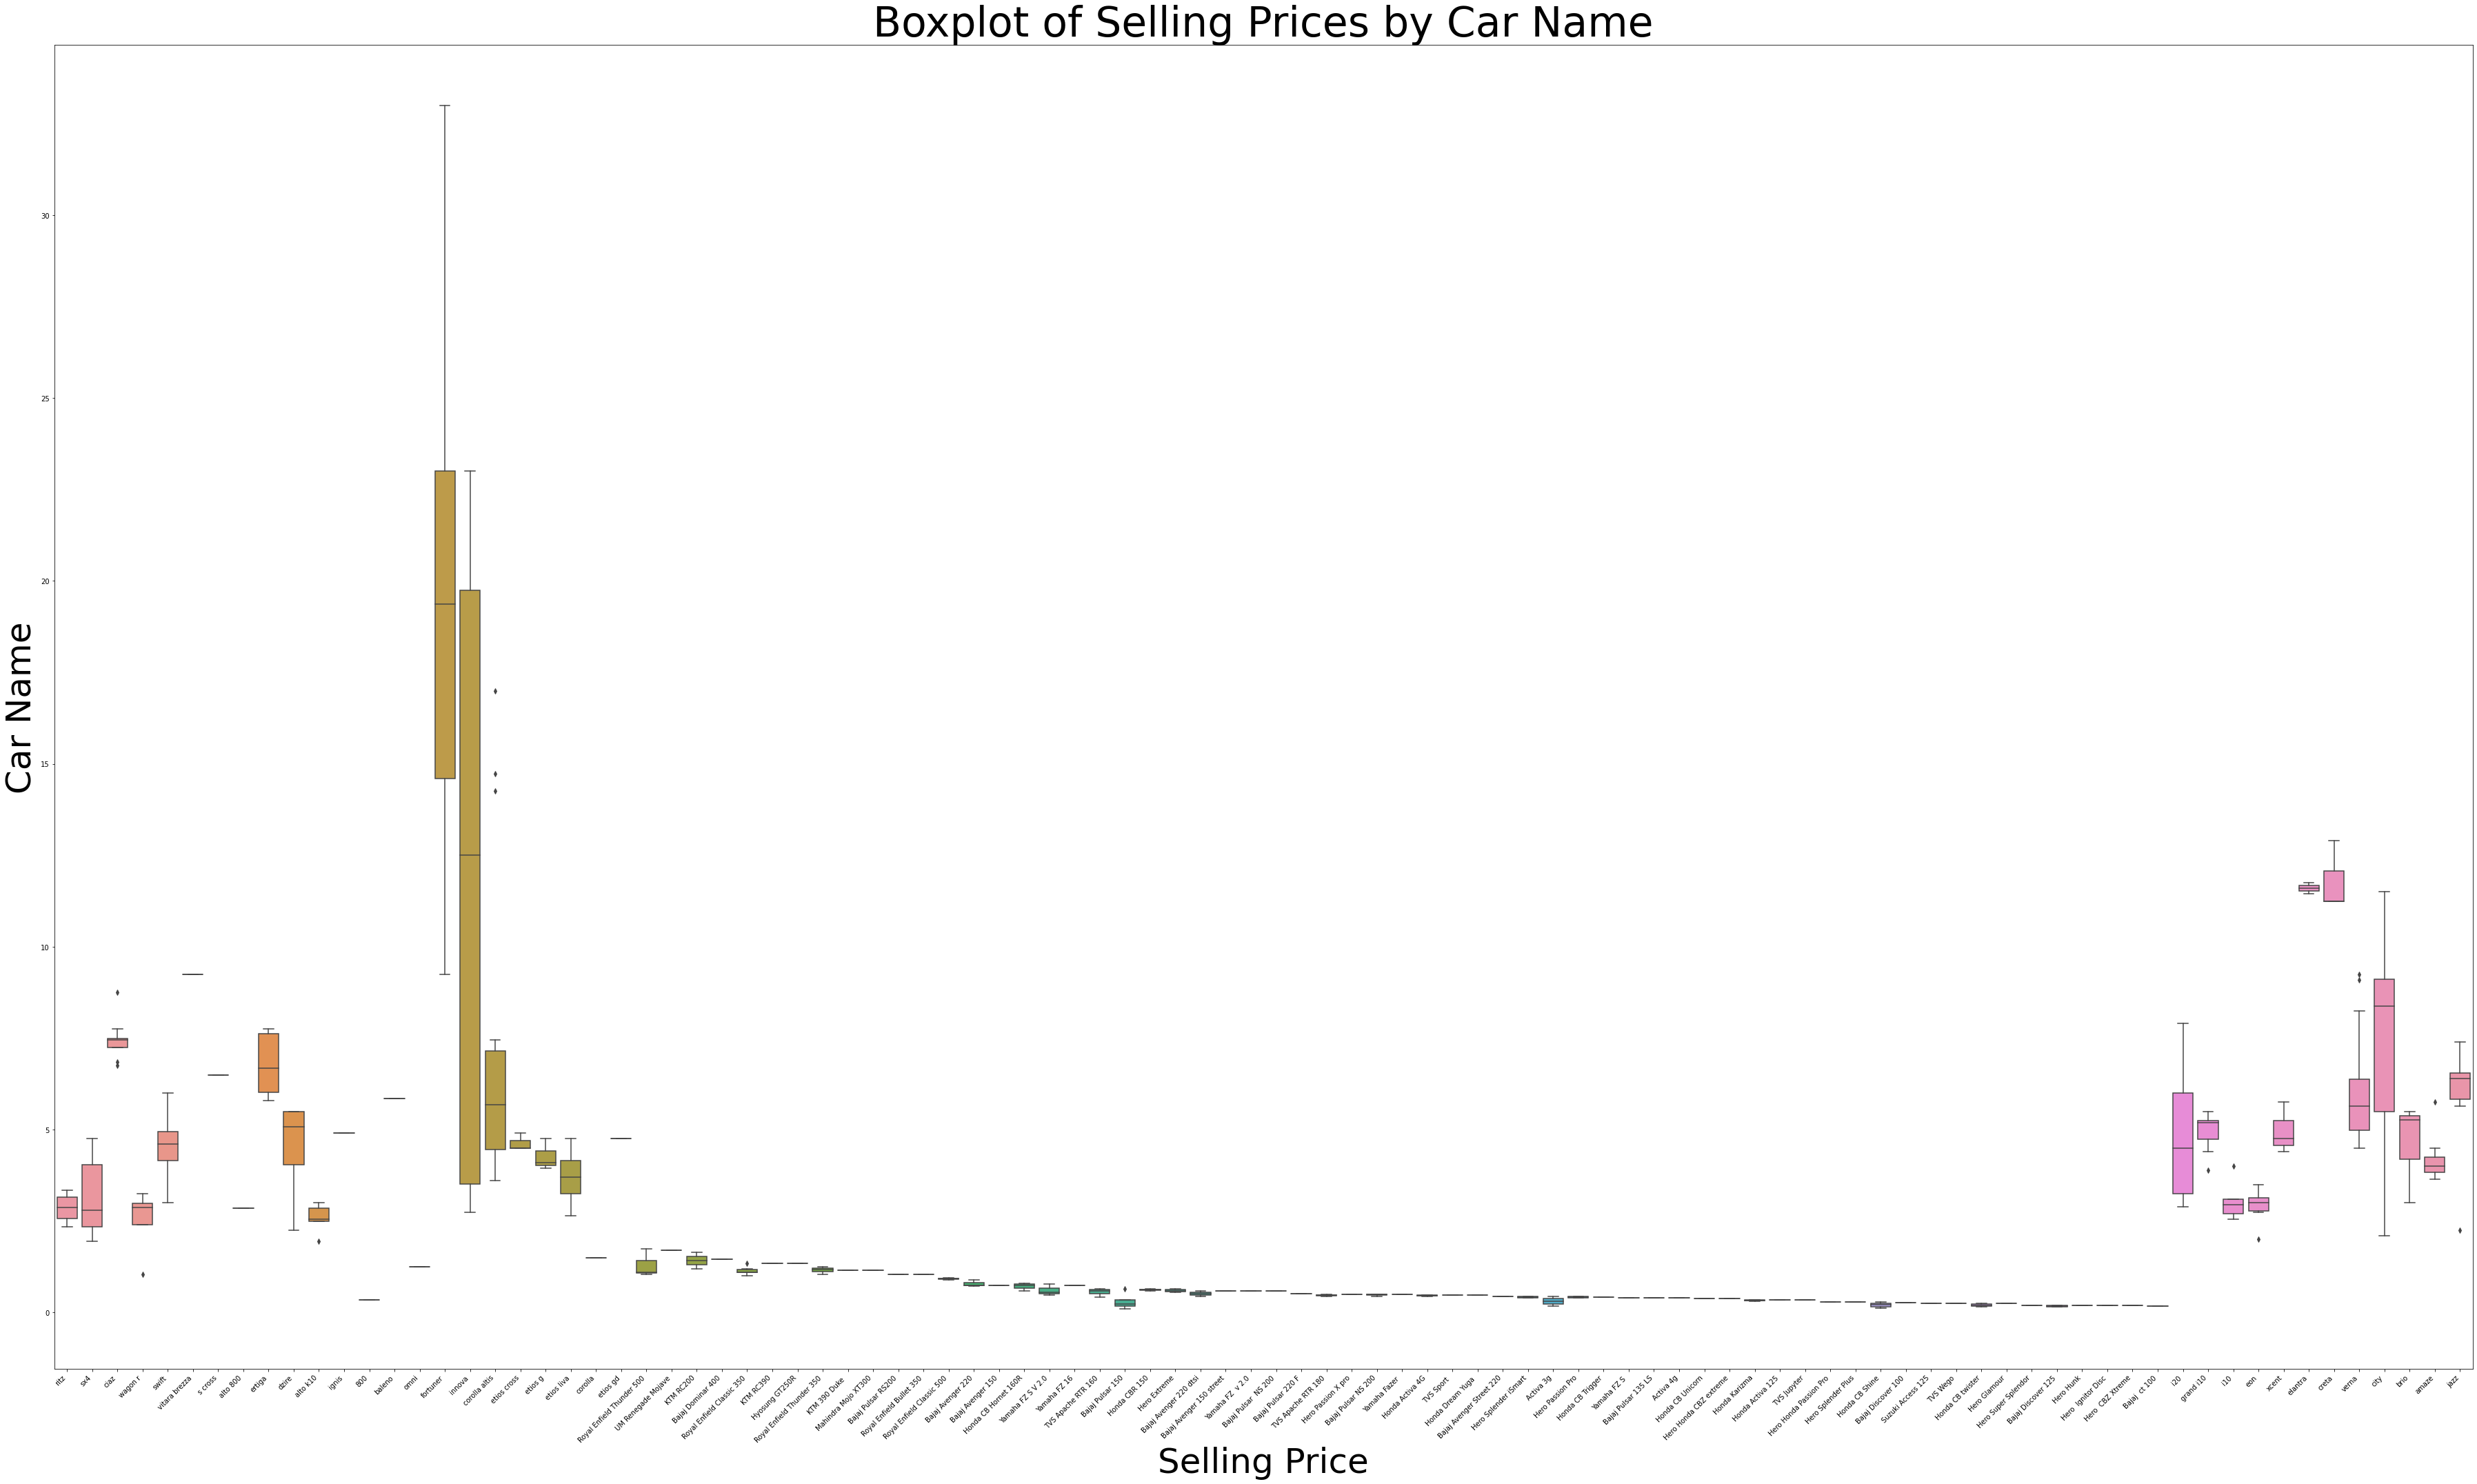

In [62]:
# Create the boxplot
plt.figure(figsize=(50, 30))
ax = sns.boxplot(x='Car_Name', y='Selling_Price', data=car_df)
# Improve the visualization
ax.set_title('Boxplot of Selling Prices by Car Name', fontsize=60)
ax.set_xlabel('Selling Price', fontsize=50)
ax.set_ylabel('Car Name', fontsize=50)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45, ha='right')

# Ensure that the layout fits well
plt.tight_layout()
plt.show()

## Checking relatioship with year with price

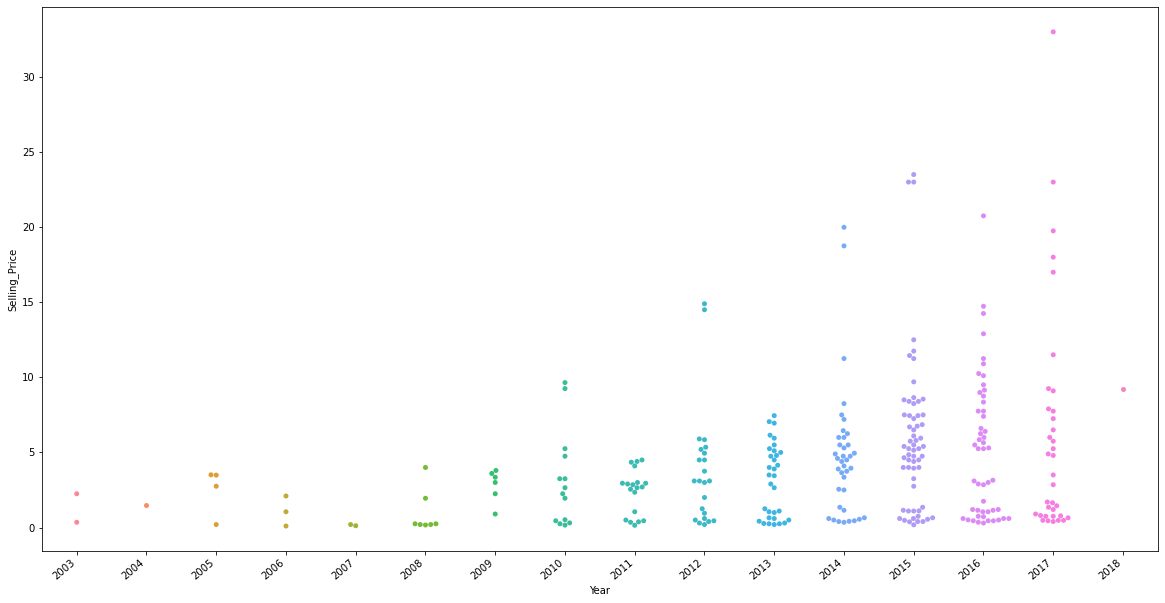

In [64]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='Year',y='Selling_Price',data=car_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

## Checking relationship of kms_driven with Price

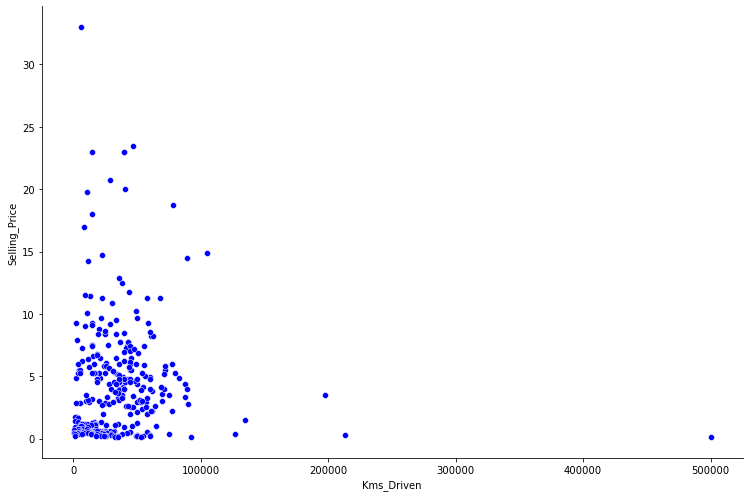

In [70]:
sns.relplot(x='Kms_Driven',y='Selling_Price',data=car_df,height=7,aspect=1.5, color = "blue")



## Checking relationship of Fuel Type with PRice 

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

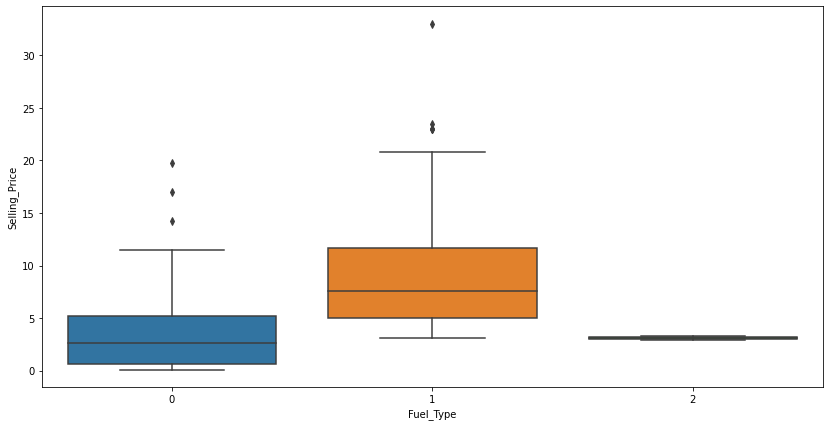

In [72]:
plt.subplots(figsize = (14,7))
sns.boxplot(x = 'Fuel_Type', y = "Selling_Price", data = car_df)

#0 :petrol, 1:diesel, 2: cng

## Relationship of Price With Fuel_Type, Year, Car_Name

C:\Users\suyash\AppData\Local\Temp/ipykernel_14172/541825135.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


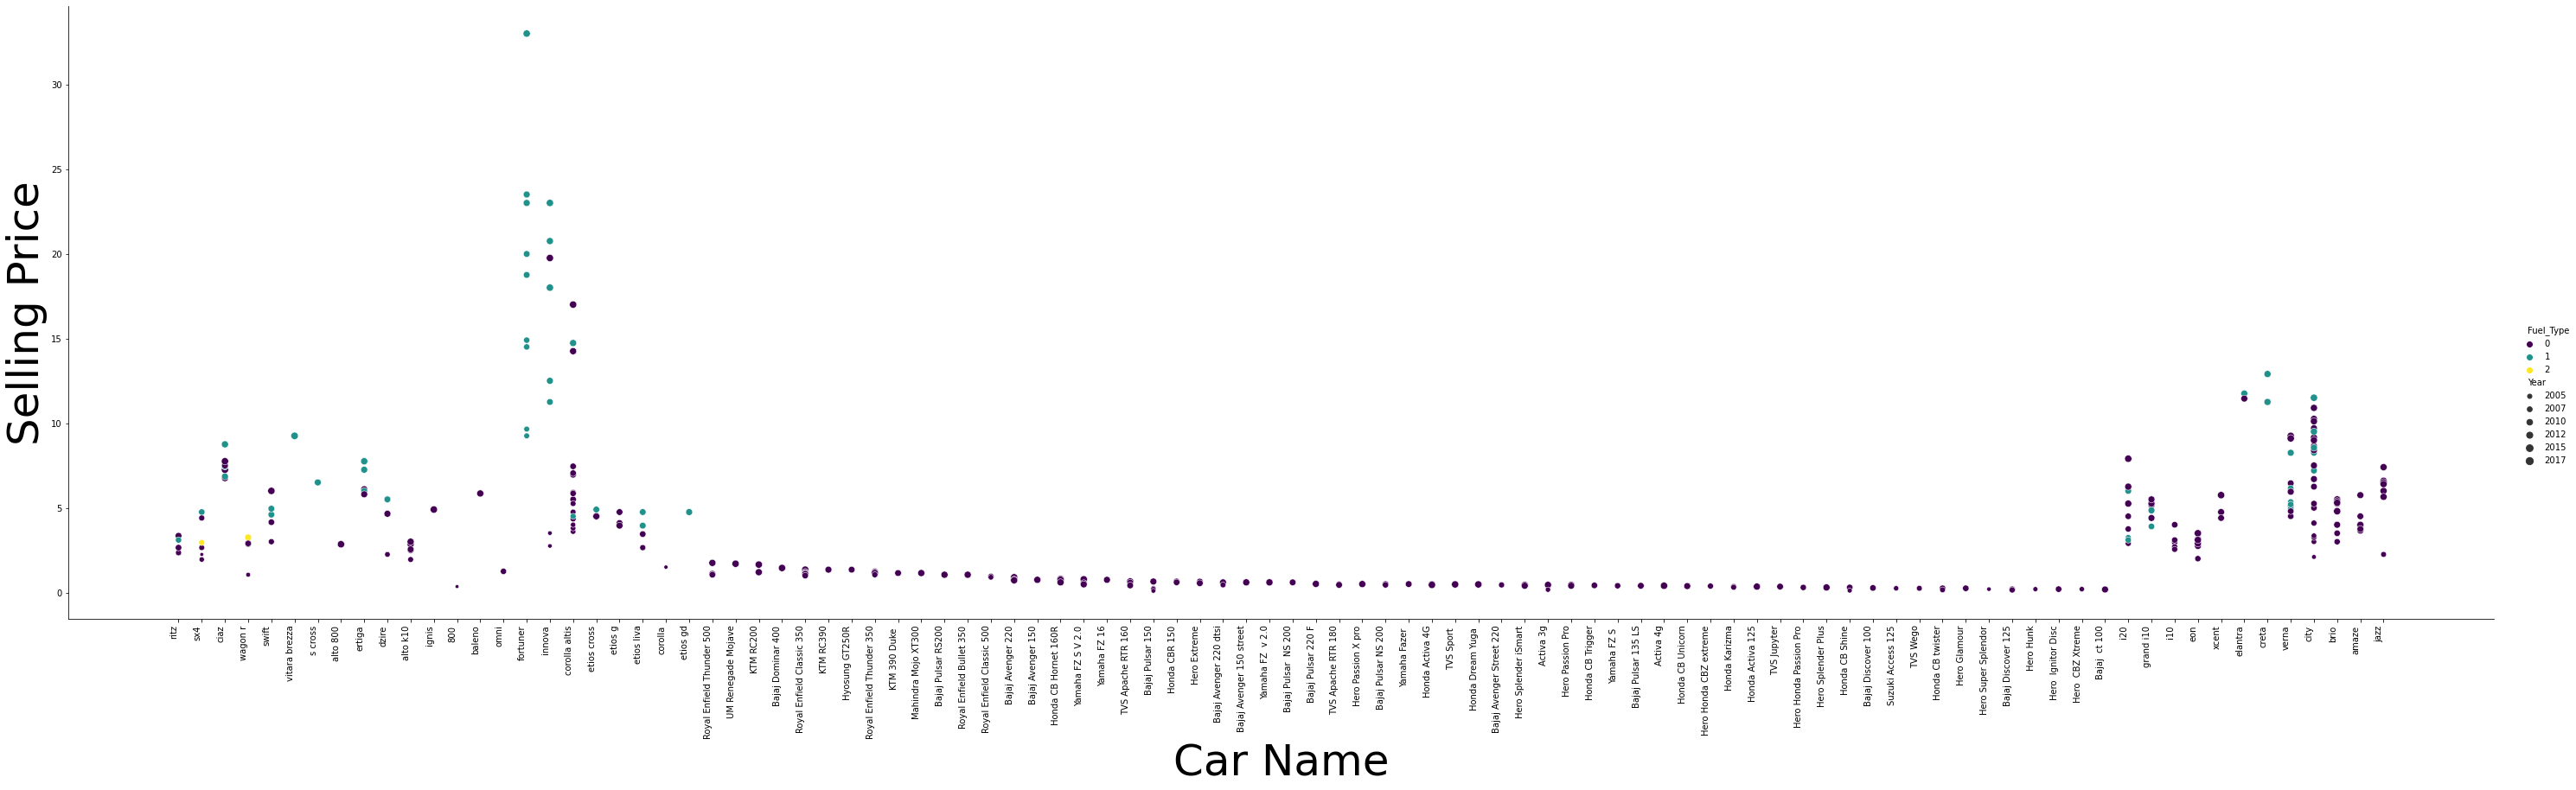

In [95]:
# Create the relplot
g = sns.relplot(
    x='Car_Name', y='Selling_Price', 
    data=car_df, hue='Fuel_Type', 
    size='Year', height=20, aspect=2 ,palette='viridis'
)

# Access the axes from the FacetGrid object
ax = g.ax

# Adjust figure size and layout
plt.subplots_adjust(bottom=0.5)  # Adjust bottom space to fit x-axis labels

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Add titles and labels if needed
ax.set_xlabel('Car Name', fontsize=50)
ax.set_ylabel('Selling Price', fontsize=50)

# Show the plot
plt.show()

## checking the distribution of categorical data

In [9]:

print(car_df.Fuel_Type.value_counts()) #gives the total count of petrol , diesel and cng

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [10]:
print(car_df.Seller_Type.value_counts()) #gives the total count of Dealer and individual seller

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [11]:
print(car_df.Transmission.value_counts()) #gives the total count of Manual and atomatic transmission

Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding categorical data

In [12]:
#encoding "Fuel_Type" column

car_df.replace({'Fuel_Type': {'Petrol' :0, 'Diesel' :1,'CNG':2}}, inplace= True)

In [13]:
#encoding "Seller_type" column
car_df.replace({'Seller_Type': {'Dealer' :0, 'Individual' :1}}, inplace= True)

In [14]:
#encoding "Transmission" column
car_df.replace({'Transmission': {'Manual' :0, 'Automatic' :1}}, inplace= True)

In [15]:
car_df.head() 

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [16]:
# Remove outliers using Z-Score
from sklearn.ensemble import IsolationForest

# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01)  # Adjust contamination based on expected outlier proportion
outliers_iso = iso_forest.fit_predict(car_df.select_dtypes(include=[np.number]))

# Convert -1 (outliers) to True and 1 (inliers) to False
outliers_iso = outliers_iso == -1

# Remove outliers
car_df = car_df[~outliers_iso]

# Splitting the data into Training data Test Data


In [17]:
X = car_df.drop(['Car_Name','Selling_Price'],axis =1)
X

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [18]:
y = car_df['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 298, dtype: float64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [20]:
print(X.shape, X_train.shape, X_test.shape)

(298, 7) (238, 7) (60, 7)


# Model Training

In [21]:
#Loading the Linear Regression Model
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

# Model Evaluation


In [23]:
#prediction on Training data
Training_data_pred  = model.predict(X_train)
Training_data_pred

array([ 2.08393525, -0.7091973 ,  2.25660442,  2.46020297,  5.89827294,
        0.55068513,  1.68746601,  0.73183364,  6.0497066 ,  3.24109525,
        7.92509529,  5.51248367,  0.79604891,  5.90170371,  1.39955324,
        0.8994448 ,  8.61636263,  6.49815995,  2.34032082,  1.4856124 ,
        2.22261568,  5.27748546,  3.37091671,  1.03071182,  6.20796624,
        1.73015218, 10.04632664,  4.10711445,  5.73338914,  1.08758986,
        5.54318741,  2.26140648,  1.69324748,  6.34779591,  3.27895193,
        9.8539214 ,  1.6189882 ,  2.09069845,  4.77797918,  3.93031165,
       -1.62137414,  4.77677937,  5.31079224,  0.95562582,  1.44261703,
        1.06783691,  5.28962744, -0.34478295,  7.6756158 , 17.75172135,
        2.25694188,  1.11782168,  0.61784508,  8.81409818,  1.07356318,
        7.03476831, 10.70670445,  6.49813889, -1.70632059,  1.40033114,
        1.32945701, -1.6269094 ,  1.76125353,  0.93087187,  8.18617181,
        0.07571084,  6.7497049 ,  2.57708886,  3.38265957,  1.92

In [24]:
#use R2 error
error_score = metrics.r2_score(y_train, Training_data_pred)
error_score

0.9002453994413491

Visualize the actual price and predicted price


Text(0.5, 1.0, 'Actual Prices vs Predicted Price')

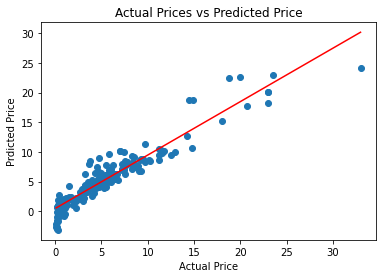

In [25]:
plt.scatter(y_train, Training_data_pred)

# Calculate the best-fit line
slope, intercept = np.polyfit(y_train, Training_data_pred, 1)
x_values = np.linspace(min(y_train), max(y_train), 100)
y_values = slope * x_values + intercept

# Plot the best-fit line
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

plt.xlabel("Actual Price")
plt.ylabel("Prdicted Price")
plt.title("Actual Prices vs Predicted Price")

In [26]:
#prediction on Testing data

Test_data_pred  = model.predict(X_test)
Test_data_pred 

array([ 0.15006122,  6.52961819,  4.67326566,  6.87491446, -0.34268779,
        4.23739443,  0.41581665, -1.1331223 ,  4.21129151,  0.7711377 ,
        5.03141766,  9.95614885,  6.21762384,  2.87323598, 12.47423185,
        4.56250433,  5.35783113, 11.793236  , 11.65467773,  3.68100188,
        1.7087358 ,  0.72366275,  7.77734382,  3.13018988,  0.33197893,
        2.53154215,  5.33104449,  3.98190693,  0.89249738, -0.75583143,
        3.11526544, 11.30019503,  3.36617143,  6.18739942,  4.29812955,
        8.23194007, -0.36707581,  2.62152149,  1.91077216,  1.86665299,
        7.74749496,  1.60290387,  0.58893952,  1.89719436,  2.67597261,
        4.48811388,  0.26955087,  4.30321404,  5.49551864,  3.11675789,
        1.86067238,  2.42557371,  3.66866785,  7.03116404, -0.04430221,
       15.60787018,  0.01629634,  7.26814231,  1.62542441,  6.10286051])

In [27]:
#use R2 error
error_score = metrics.r2_score(y_test, Test_data_pred)
error_score

0.7340506047448412

Text(0.5, 1.0, 'Actual Price VS Predicted Price')

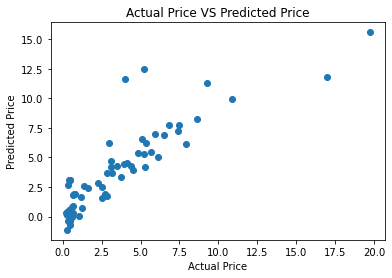

In [28]:
plt.scatter(y_test, Test_data_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")

# 2.Lasso Regression

In [29]:
#loading The Lasso Regression Model

lasso_model = Lasso()

In [30]:
lasso_model.fit(X_train, y_train)

Lasso()

## Model Evaluation 

In [31]:
#Prediction on Training Data
Training_data_pred1 = lasso_model.predict(X_train)

In [32]:
error_score = metrics.r2_score(y_train, Training_data_pred1)
error_score

0.8788215160820342

Text(0.5, 1.0, 'Actual Prices vs Predicted Price')

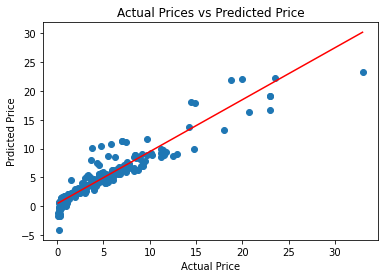

In [33]:
#visualize the Training data
plt.scatter(y_train, Training_data_pred1)

# Calculate the best-fit line
slope, intercept = np.polyfit(y_train, Training_data_pred, 1)
x_values = np.linspace(min(y_train), max(y_train), 100)
y_values = slope * x_values + intercept

# Plot the best-fit line
plt.plot(x_values, y_values, color='red', label='Best Fit Line')

plt.xlabel("Actual Price")
plt.ylabel("Prdicted Price")
plt.title("Actual Prices vs Predicted Price")

In [34]:
#prediction on Testing data

Test_data_pred1  = model.predict(X_test)
Test_data_pred1 

array([ 0.15006122,  6.52961819,  4.67326566,  6.87491446, -0.34268779,
        4.23739443,  0.41581665, -1.1331223 ,  4.21129151,  0.7711377 ,
        5.03141766,  9.95614885,  6.21762384,  2.87323598, 12.47423185,
        4.56250433,  5.35783113, 11.793236  , 11.65467773,  3.68100188,
        1.7087358 ,  0.72366275,  7.77734382,  3.13018988,  0.33197893,
        2.53154215,  5.33104449,  3.98190693,  0.89249738, -0.75583143,
        3.11526544, 11.30019503,  3.36617143,  6.18739942,  4.29812955,
        8.23194007, -0.36707581,  2.62152149,  1.91077216,  1.86665299,
        7.74749496,  1.60290387,  0.58893952,  1.89719436,  2.67597261,
        4.48811388,  0.26955087,  4.30321404,  5.49551864,  3.11675789,
        1.86067238,  2.42557371,  3.66866785,  7.03116404, -0.04430221,
       15.60787018,  0.01629634,  7.26814231,  1.62542441,  6.10286051])

In [35]:
#use R2 error
error_score1 = metrics.r2_score(y_test, Test_data_pred1)
error_score1

0.7340506047448412

Text(0.5, 1.0, 'Actual Price VS Predicted Price')

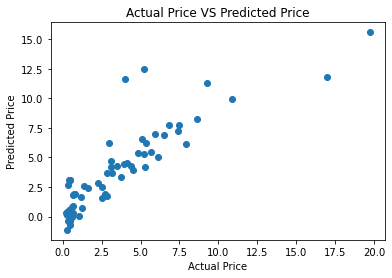

In [36]:
plt.scatter(y_test, Test_data_pred1)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price VS Predicted Price")